<a href="https://colab.research.google.com/github/Arjun9271/Pytorch/blob/main/6_ANN_using_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset,DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
# set random seeds for reproducibility

torch.manual_seed(42)

In [ ]:
df = pd.read_csv('/content/drive/My Drive/data_assignment/fmnist_small.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


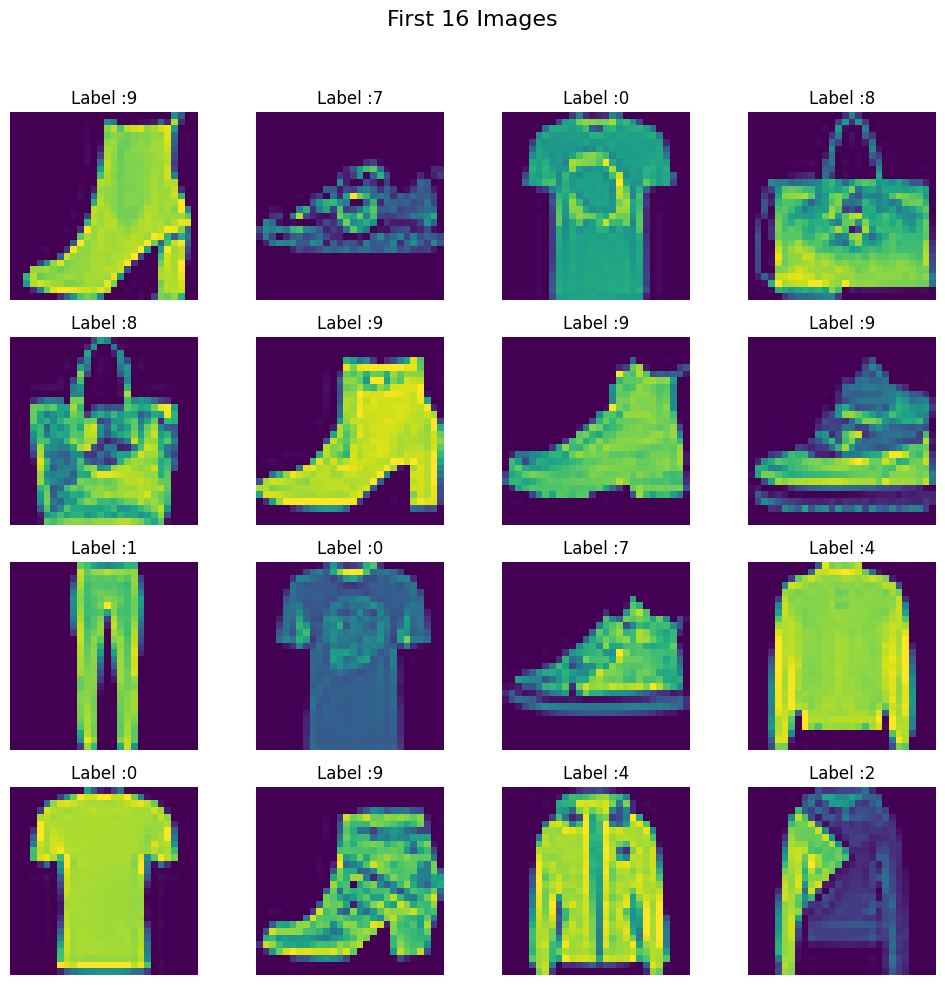

In [ ]:
# create a 4*4 grid of images

fig,axes = plt.subplots(4,4,figsize=(10,10))
fig.suptitle('First 16 Images',fontsize = 16)

#plot the first 16 images from dataset

for i,ax in enumerate(axes.flat):
         img = df.iloc[i,1:].values.reshape(28,28)  # reshape to 28*28
         ax.imshow(img) # display in grey scale
         ax.axis('off') # remove axis for a cleaner look
         ax.set_title(f'Label :{df.iloc[i,0]}') # show label
plt.tight_layout(rect = [0,0,1,0.95])
plt.show()

In [ ]:
# train test split

X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [ ]:
# scaling the features

X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
X_train

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.0627451, 0.       ,
        0.       ]])

In [ ]:
# create CustomDataset Class

class CustomDataset(Dataset):

    def __init__(self,features,labels):
        self.features = torch.tensor(features,dtype = torch.float32)
        self.labels = torch.tensor(labels,dtype = torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self,idx):
        return self.features[idx],self.labels[idx]




In [ ]:
# create train_dataset object :

train_dataset = CustomDataset(X_train,y_train)

In [ ]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [ ]:
# create test_dataset object

test_dataset = CustomDataset(X_test,y_test)

In [ ]:
# create train and test loader

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
# define NN class

class MyNN(nn.Module):

        def __init__(self, num_features):

               super().__init__()
               self.model = nn.Sequential(
                    nn.Linear(num_features, 128),
                    nn.ReLU(),
                    nn.Linear(128, 64),
                    nn.ReLU(),
                    nn.Linear(64, 10)
               )

        def forward(self, x):

              return self.model(x)


In [ ]:
# set learning rate and epochs

epochs = 100
learning_rate = 0.01

In [ ]:
# initiate the model
model = MyNN(X_train.shape[1])

#loss function
criterion = nn.CrossEntropyLoss()

#optimizer
optimizer = optim.SGD(model.parameters(),lr = learning_rate)

In [ ]:
len(train_loader)

150

In [ ]:
# training loop

for epoch in range(epochs):

  total_epoch_loss = 0

  for batch_features, batch_labels in train_loader:

    # forward pass
    outputs = model(batch_features)

    # calculate loss
    loss = criterion(outputs, batch_labels)

    # back pass
    optimizer.zero_grad()
    loss.backward()

    # update grads
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss/len(train_loader)
  print(f'Epoch: {epoch + 1} , Loss: {avg_loss}')


Epoch: 1 , Loss: 2.23156574567159
Epoch: 2 , Loss: 1.9296534633636475
Epoch: 3 , Loss: 1.467901402314504
Epoch: 4 , Loss: 1.159659315745036
Epoch: 5 , Loss: 0.9978790767987569
Epoch: 6 , Loss: 0.9058963827292125
Epoch: 7 , Loss: 0.8442590538660685
Epoch: 8 , Loss: 0.8021447255214056
Epoch: 9 , Loss: 0.770120136141777
Epoch: 10 , Loss: 0.7375302422046661
Epoch: 11 , Loss: 0.7178209410111109
Epoch: 12 , Loss: 0.6934664754072825
Epoch: 13 , Loss: 0.6709202019373576
Epoch: 14 , Loss: 0.6452001112699509
Epoch: 15 , Loss: 0.6340728811422984
Epoch: 16 , Loss: 0.6087007466952006
Epoch: 17 , Loss: 0.5968323193987211
Epoch: 18 , Loss: 0.5826476162672043
Epoch: 19 , Loss: 0.5690014731884002
Epoch: 20 , Loss: 0.5587047390143076
Epoch: 21 , Loss: 0.5466552395621935
Epoch: 22 , Loss: 0.5330179723103842
Epoch: 23 , Loss: 0.5271532390515009
Epoch: 24 , Loss: 0.5159853527943293
Epoch: 25 , Loss: 0.5083059345682462
Epoch: 26 , Loss: 0.5009250516692797
Epoch: 27 , Loss: 0.4954826858639717
Epoch: 28 , Los

In [ ]:
# set model to eval mode
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [ ]:
# evaluation code
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in test_loader:

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)


0.8158333333333333


In [ ]:
len(test_loader)

38